In [1]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
file_path = 'headlines/merged_file.csv'
data = pd.read_csv(file_path)

In [3]:
# Step 4: Load the pre-trained sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [4]:
# Step 5: Define a function to get sentiment for a given text
def get_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]['label'], result[0]['score']

In [5]:
# Step 6: Apply the function to the headlines
data['sentiment'], data['confidence'] = zip(*data['headline'].apply(get_sentiment))

In [6]:
# Step 7: Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Step 8: Sort the dataframe by date
data = data.sort_values(by='date')

In [7]:
# Step 9: Calculate the average sentiment score per month
data['year_month'] = data['date'].dt.to_period('M')
average_sentiment_per_month = data.groupby('year_month')['confidence'].mean().reset_index()
average_sentiment_per_month['year_month'] = average_sentiment_per_month['year_month'].dt.to_timestamp()

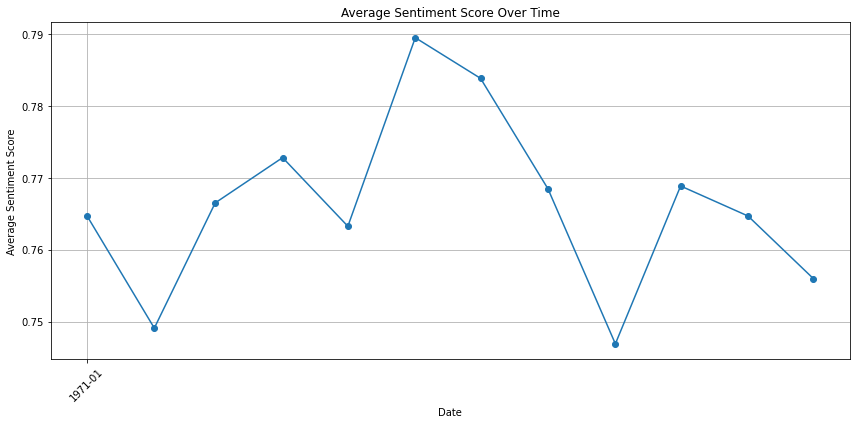

In [8]:
# Step 10: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_month['year_month'], average_sentiment_per_month['confidence'], marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

# Formatting the date on x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from scipy.ndimage import gaussian_filter1d

In [10]:
# Step 10: Smooth the sentiment scores using a Gaussian filter
average_sentiment_per_month['smoothed_confidence'] = gaussian_filter1d(average_sentiment_per_month['confidence'], sigma=2)

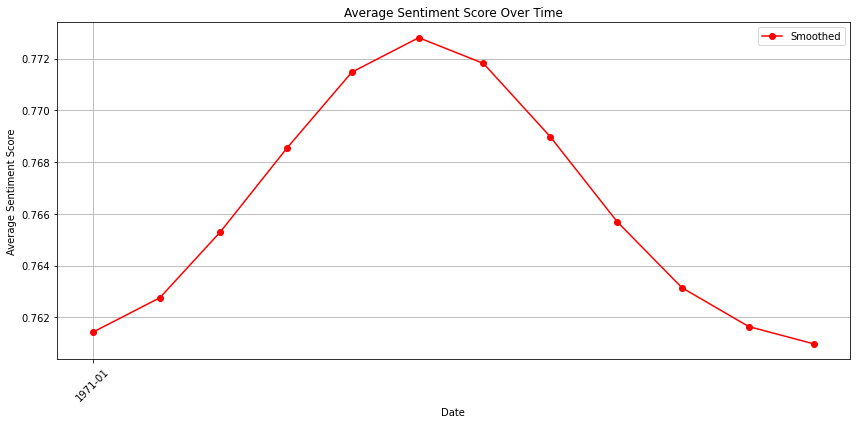

In [11]:
# Step 11: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
# plt.plot(average_sentiment_per_month['year_month'], average_sentiment_per_month['confidence'], marker='o', label='Original')
plt.plot(average_sentiment_per_month['year_month'], average_sentiment_per_month['smoothed_confidence'], marker='o', label='Smoothed', color='red')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Formatting the date on x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Step 7: Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Step 8: Sort the dataframe by date
data = data.sort_values(by='date')

# Step 9: Calculate the average sentiment score per day
average_sentiment_per_day = data.groupby(data['date'].dt.date)['confidence'].mean().reset_index()
average_sentiment_per_day['date'] = pd.to_datetime(average_sentiment_per_day['date'])


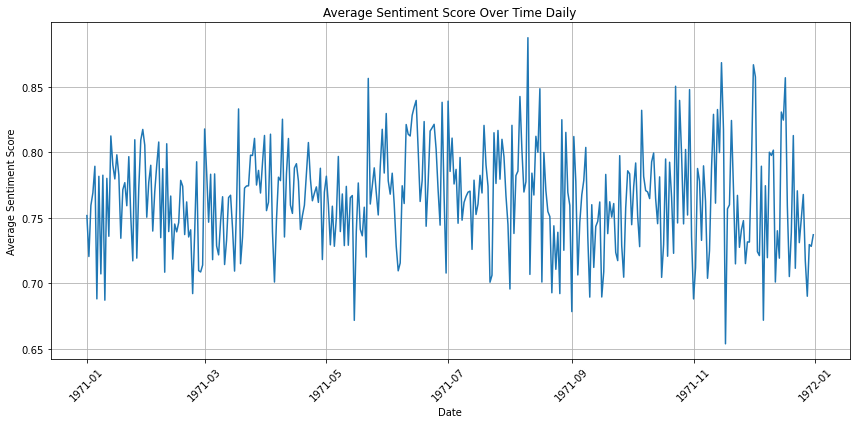

In [13]:
# Step 10: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day['date'], average_sentiment_per_day['confidence'])
plt.title('Average Sentiment Score Over Time Daily')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

# # Formatting the date on x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Step 10: Apply Gaussian filter to smooth the sentiment scores
sigma = 2  # You can adjust the sigma value to control the amount of smoothing
average_sentiment_per_day['smoothed_confidence'] = gaussian_filter1d(average_sentiment_per_day['confidence'], sigma=sigma)

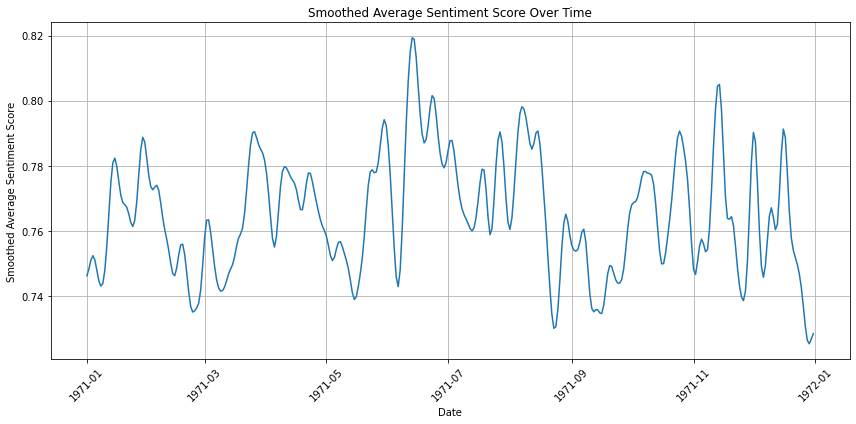

In [15]:
# Step 11: Plot the average sentiment score over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day['date'], average_sentiment_per_day['smoothed_confidence'])
plt.title('Smoothed Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Smoothed Average Sentiment Score')
plt.grid(True)

# # Formatting the date on x-axis
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()